<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Optional:--Explore-Dataset" data-toc-modified-id="Optional:--Explore-Dataset-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Optional:  Explore Dataset</a></span></li></ul></li><li><span><a href="#restricted-boltzmann-machine" data-toc-modified-id="restricted-boltzmann-machine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>restricted boltzmann machine</a></span><ul class="toc-item"><li><span><a href="#Vary-epochs" data-toc-modified-id="Vary-epochs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vary epochs</a></span></li><li><span><a href="#Vary-hidden-layer-size" data-toc-modified-id="Vary-hidden-layer-size-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Vary hidden layer size</a></span></li><li><span><a href="#Examinate-Outcome" data-toc-modified-id="Examinate-Outcome-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Examinate Outcome</a></span></li></ul></li><li><span><a href="#deep--belief-net" data-toc-modified-id="deep--belief-net-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>deep- belief net</a></span><ul class="toc-item"><li><span><a href="#Two-stack-RBM" data-toc-modified-id="Two-stack-RBM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Two stack RBM</a></span></li></ul></li><li><span><a href="#greedy-layer-wise-training" data-toc-modified-id="greedy-layer-wise-training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>greedy layer-wise training</a></span></li><li><span><a href="#fine-tune-wake-sleep-training" data-toc-modified-id="fine-tune-wake-sleep-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>fine-tune wake-sleep training</a></span></li></ul></div>

**Imports**

In [80]:
# Re-import packages if they change
%load_ext autoreload
%autoreload 2

import struct
import matplotlib.animation as animation

import matplotlib.pyplot as plt 
import tqdm
import matplotlib.image as mpimg 

from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Declare image-size and load dataset**

In [81]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

### Optional:  Explore Dataset

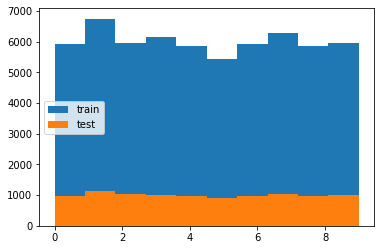

In [16]:
# Distribution of Classes in training and test 
plt.hist(np.where(train_lbls == 1)[1], label='train')
plt.hist(np.where(test_lbls == 1)[1], label='test')
plt.legend(loc = 'center left')

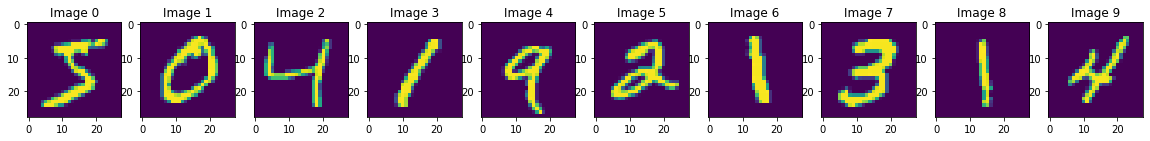

In [34]:
#Vizualising random images
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    axs[i].set_title('Image {:d}'.format(i))
    axs[i].imshow(train_imgs[i].reshape((28,28)))
plt.show()

In [39]:
# Image shape
print("Image shape: ", train_imgs[0].shape)
print("Max Image value: ", np.max(train_imgs))
print("Min Image value: ", np.min(train_imgs))
# print('Unique Image values: ', np.unique(train_imgs))  # Input not only zero and 1
print("Number of training samples: ", train_imgs.shape[0])
print("Number of test samples: ", test_imgs.shape[0])

Image shape:  (784,)
Max Image value:  1.0
Min Image value:  0.0
Number of training samples:  60000
Number of test samples:  10000


## restricted boltzmann machine

<div class="alert alert-note">
<b>Task: </b> 
Implement an RBM for recognisisng MNIST images
   
* with binary stochatic units
* train with a contrastive divergence algorithm $CD_1$
* start with 500 units
</div>

<div class="alert alert-success">
<b>Vary number of epochs</b>
    
* loss starts quite high with 45 
* converges to around 10/11
* more than 10 epochs doesn't change anything

<b>Effect of hidden layer size</b>
    
* loss starts smaller with 11
* loss decreases till 5.3 

<b>Examine outcomes</b>
    
* respective field visualize ... 
* images do not look similar ... 
</div>

<div class="alert alert-danger">
<b>Questions</b> 

* do we need to do something with the weight matrix in the beginning? Because it is already initialized... 
* why does the loss  vary?
* what should the respective fields visualize? 
* should we use the probability value once? for weight update? -> eigther only activations or prob for v0 an h0 and activations for v1 and h1
</div>

### Vary epochs


Starting a Restricted Boltzmann Machine..
Trained for 60000 iterations
learning CD1


Epoch:  0


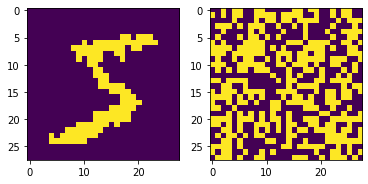

iteration=      0 recon_loss=44.4860


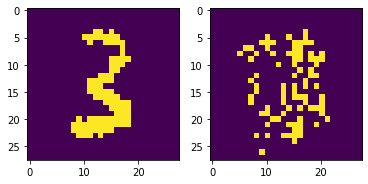

iteration=   5000 recon_loss=11.1473
Epoch:  1


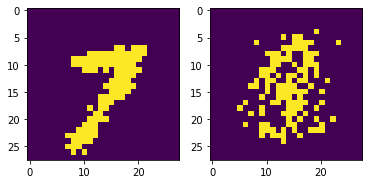

iteration=  10000 recon_loss=12.8002
Epoch:  2


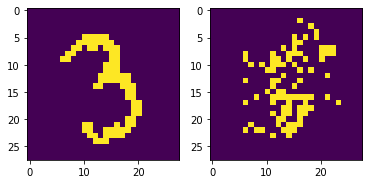

iteration=  15000 recon_loss=13.9875
Epoch:  3


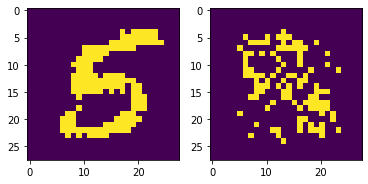

iteration=  20000 recon_loss=11.0573
Epoch:  4


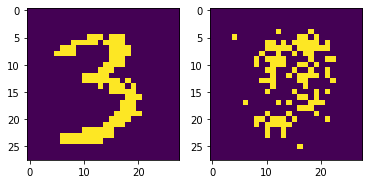

iteration=  25000 recon_loss=10.9747
Epoch:  5


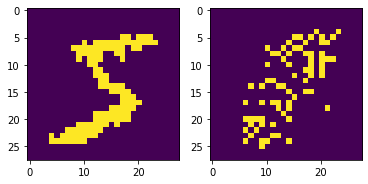

iteration=  30000 recon_loss=12.1580


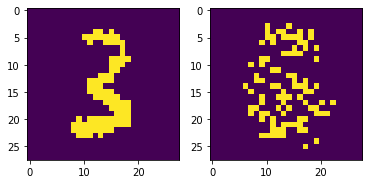

iteration=  35000 recon_loss=11.3162
Epoch:  6


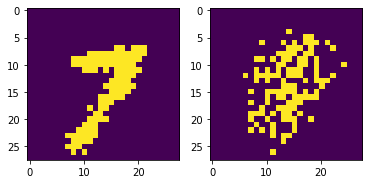

iteration=  40000 recon_loss=12.7151
Epoch:  7


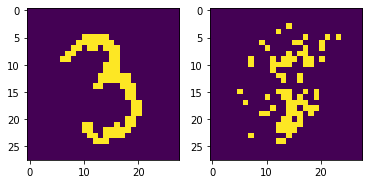

iteration=  45000 recon_loss=13.8642
Epoch:  8


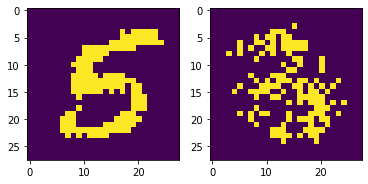

iteration=  50000 recon_loss=10.9951
Epoch:  9


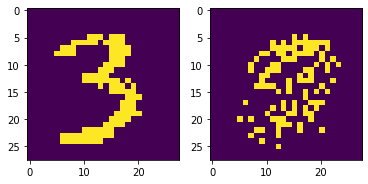

iteration=  55000 recon_loss=11.0307


Starting a Restricted Boltzmann Machine..
Trained for 90000 iterations
learning CD1


Epoch:  0


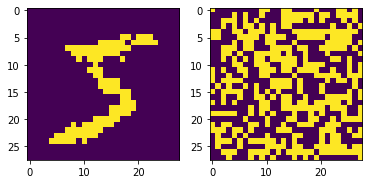

iteration=      0 recon_loss=44.4362


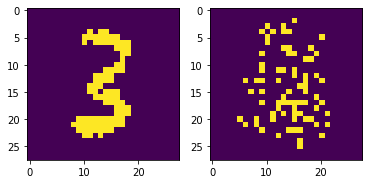

iteration=   5000 recon_loss=11.1224
Epoch:  1


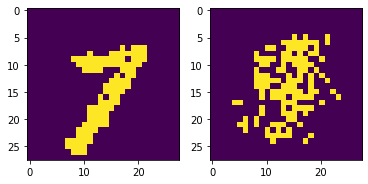

iteration=  10000 recon_loss=12.4087
Epoch:  2


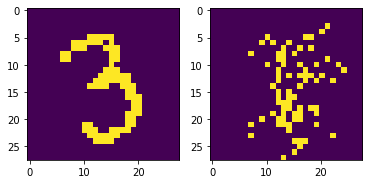

iteration=  15000 recon_loss=14.7573
Epoch:  3


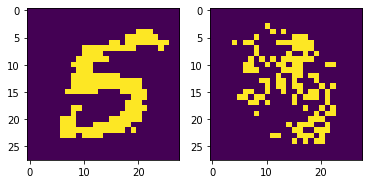

iteration=  20000 recon_loss=11.4856
Epoch:  4


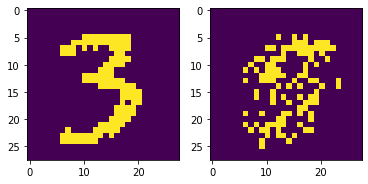

iteration=  25000 recon_loss=10.8655
Epoch:  5


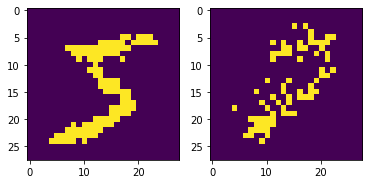

iteration=  30000 recon_loss=13.0281


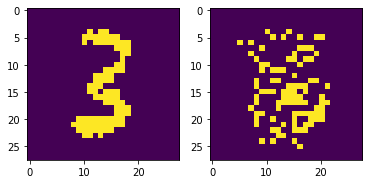

iteration=  35000 recon_loss=11.3396
Epoch:  6


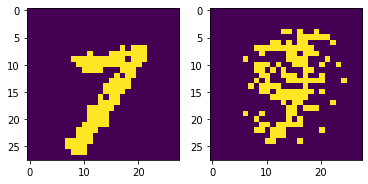

iteration=  40000 recon_loss=12.4235
Epoch:  7


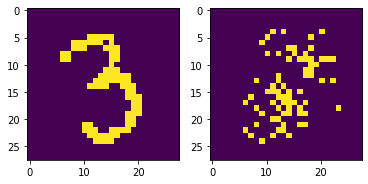

iteration=  45000 recon_loss=14.8677
Epoch:  8


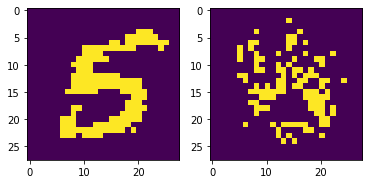

iteration=  50000 recon_loss=11.3751
Epoch:  9


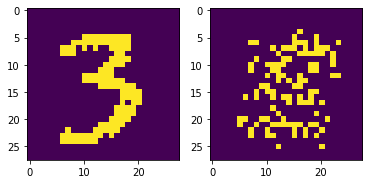

iteration=  55000 recon_loss=11.0330
Epoch:  10


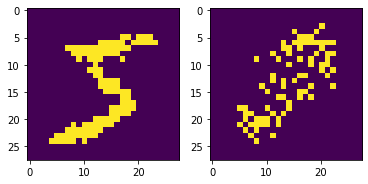

iteration=  60000 recon_loss=12.2356


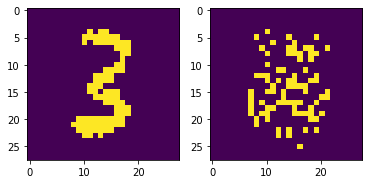

iteration=  65000 recon_loss=11.3972
Epoch:  11


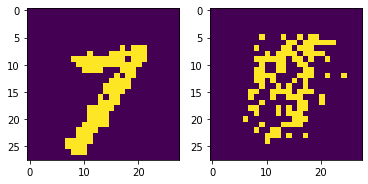

iteration=  70000 recon_loss=11.9981
Epoch:  12


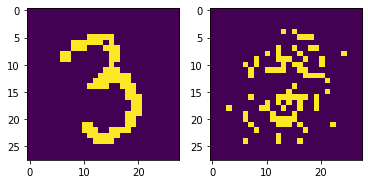

iteration=  75000 recon_loss=14.6490
Epoch:  13


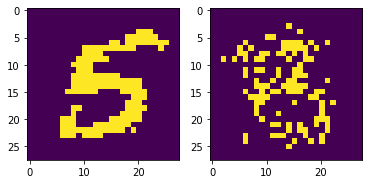

iteration=  80000 recon_loss=11.4225
Epoch:  14


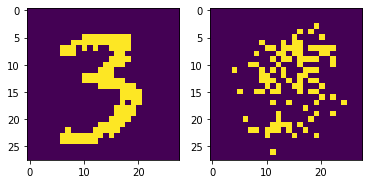

iteration=  85000 recon_loss=10.9210



In [82]:
batch_size = 20
epochs = np.arange(10, 20, 5)
#n_iterations_basic = int(train_imgs.shape[0] / batch_size * i)
for i in epochs:
    print("\nStarting a Restricted Boltzmann Machine..")
    # Changed from 10
    rbm = RestrictedBoltzmannMachine(
        ndim_visible=image_size[0] * image_size[1],
        ndim_hidden=500,
        is_bottom=True,
        image_size=image_size,
        is_top=False,
        n_labels=10,
        batch_size=batch_size,
    )
    # each epoch corresponds to a full swipe through a training set divided into mini-batches
    n_iterations = int(train_imgs.shape[0] / batch_size * i)
    print("Trained for {:d} iterations".format(n_iterations))
    rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations)

### Vary hidden layer size


Starting a Restricted Boltzmann Machine..
Trained for 30000 iterations
learning CD1
3000


Epoch:  0


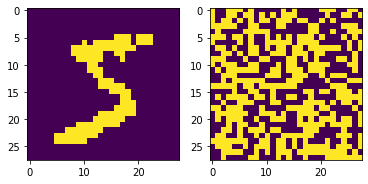

iteration=      0 recon_loss=58.6746
Epoch:  1


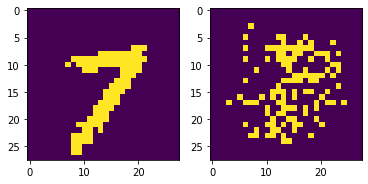

iteration=   5000 recon_loss=11.5875
Epoch:  2
Epoch:  3


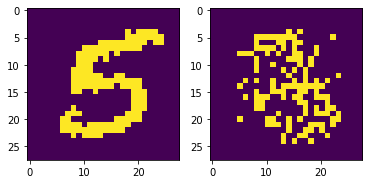

iteration=  10000 recon_loss=12.1053
Epoch:  4
Epoch:  5


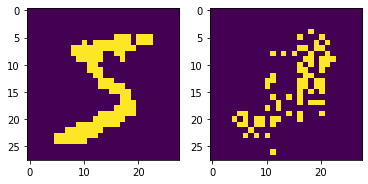

iteration=  15000 recon_loss=12.8758
Epoch:  6


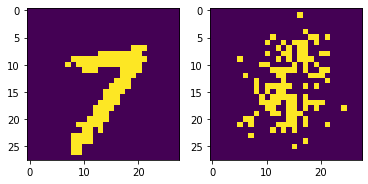

iteration=  20000 recon_loss=11.6921
Epoch:  7
Epoch:  8


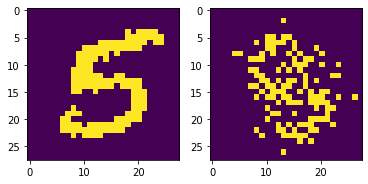

iteration=  25000 recon_loss=12.0897
Epoch:  9


Starting a Restricted Boltzmann Machine..
Trained for 45000 iterations
learning CD1
3000


Epoch:  0


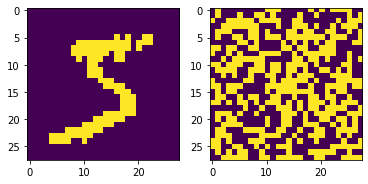

iteration=      0 recon_loss=58.3875
Epoch:  1


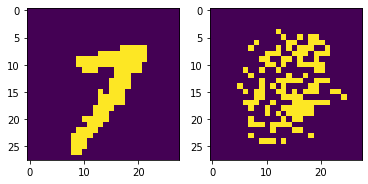

iteration=   5000 recon_loss=11.4446
Epoch:  2
Epoch:  3


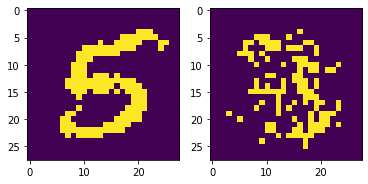

iteration=  10000 recon_loss=12.3597
Epoch:  4
Epoch:  5


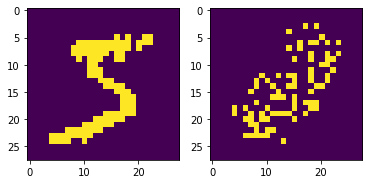

iteration=  15000 recon_loss=13.4302
Epoch:  6


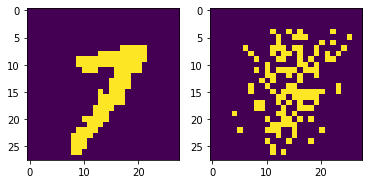

KeyboardInterrupt: 

In [56]:
batch_size = 10
epochs = np.arange(10, 20, 5)
#n_iterations_basic = int(train_imgs.shape[0] / batch_size * i)
for i in epochs:
    print("\nStarting a Restricted Boltzmann Machine..")
    # Changed from 10
    rbm = RestrictedBoltzmannMachine(
        ndim_visible=image_size[0] * image_size[1],
        ndim_hidden=200,
        is_bottom=True,
        image_size=image_size,
        is_top=False,
        n_labels=10,
        batch_size=batch_size,
    )
    # each epoch corresponds to a full swipe through a training set divided into mini-batches
    n_iterations = int(train_imgs.shape[0] / batch_size * i)
    print("Trained for {:d} iterations".format(n_iterations))
    rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations)

### Examinate Outcome


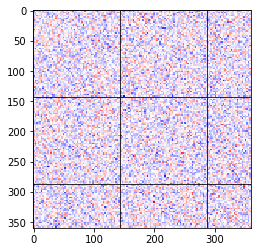

In [60]:
# Read Images 
img = mpimg.imread('rf.iter000000.png')  
plt.imshow(img)

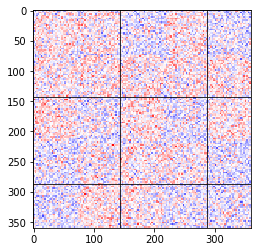

In [61]:
img = mpimg.imread('rf.iter040000.png')  
plt.imshow(img)

## deep- belief net

<div class="alert alert-note">
<b>Task: </b> 
Implement a deep networ with greedy layer-wise pretraining
   
* extend the network to a "deeper" architecture
* examine the generalisation performance
* hidden layer of the last RBM are concatenated with the hidden layer 
* bi-directional connection layer is added to perform Gibbs sampling 
</div>

<div class="alert alert-success">
<b>Two stack RBM</b>
    
* reconstruction losses 


</div>

<div class="alert alert-danger">
<b>Questions</b> 

* Do we implement two seperate rbm classes? Or do we inizialize on and then build for two cd1
* untwine_weights should we add initilize weights? 
* what is the difference between direct and not direct
* how should we calculate the input of the second/third RBM
</div>

### Two stack RBM

In [ ]:
print ("\nStarting a Deep Belief Net..")
    
dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=10
)
train_greedylayerwise(self, vis_trainset, lbl_trainset, n_iterations)

## greedy layer-wise training

In [ ]:
dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=2000)

dbn.recognize(train_imgs, train_lbls)

dbn.recognize(test_imgs, test_lbls)

for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="rbms")

## fine-tune wake-sleep training

In [ ]:
dbn.train_wakesleep_finetune(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=2000)

dbn.recognize(train_imgs, train_lbls)

dbn.recognize(test_imgs, test_lbls)

for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    dbn.generate(digit_1hot, name="dbn")